### WS : CNN Model Kernels
สร้าง CNN Model และแอบส่องดู Kernel

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
in_shape = (100, 100, 3)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 128)      

In [38]:
from tensorflow.keras.utils import plot_model 
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=120)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Kernel

In [39]:
for layer in model.layers:
    print(layer.name)

conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
flatten_1
dense_1


In [40]:
# filter กรองเอาเฉพาะที่เป็น conv2d
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    kernels, biases = layer.get_weights()
    print(layer.name, ' shape: ', kernels.shape)

conv2d_3  shape:  (3, 3, 3, 32)
conv2d_4  shape:  (3, 3, 32, 64)
conv2d_5  shape:  (3, 3, 64, 128)


In [41]:
model_layer_idx = 0 # 0 2 4
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 3, 32)

In [ ]:
kernels

In [ ]:
biases

In [42]:
kernel_idx = 3 # มีแค่ 32 ตัว (0 - 31)
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[ 0.03 -0.1  -0.05]
 [ 0.1  -0.13  0.02]
 [-0.01 -0.1   0.05]]


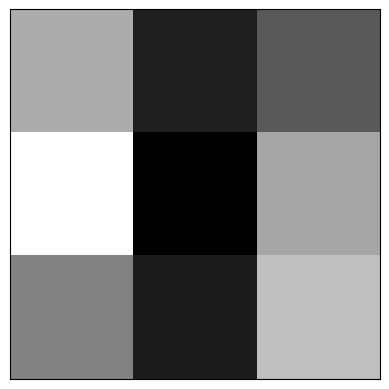

In [43]:
plt.imshow(kernel_i, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

In [44]:
layername = model.layers[model_layer_idx].name
layername

'conv2d_3'

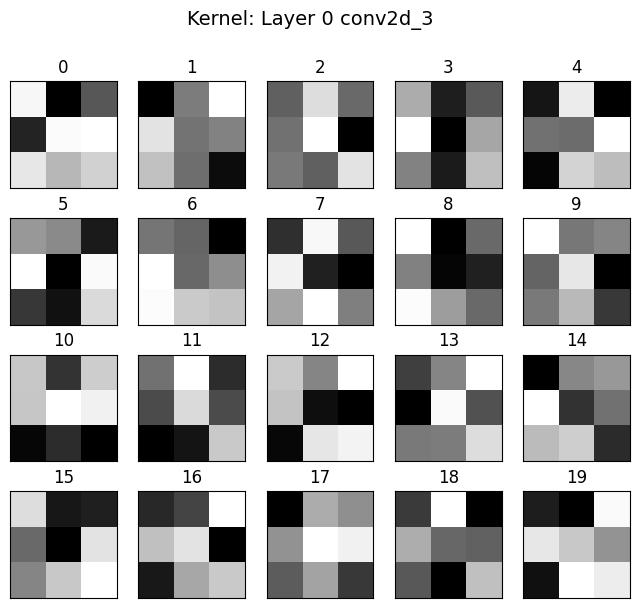

In [45]:
nplots = 20 
fig = plt.figure(figsize=(8, 6.8))

fig.suptitle(f'Kernel: Layer {model_layer_idx} {layername}', fontsize=14)

for j in range(nplots):
    plt.subplot(4, 5, j+1)
    plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
    plt.title(j)
    plt.xticks([])
    plt.yticks([])
    
plt.savefig(f'kernel {layername}.png', dpi=120)
plt.show()